In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ML models
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support
)
sns.set_theme(style='whitegrid')
print("Libraries Berhasil Di Import!")


Libraries Berhasil Di Import!


In [ ]:
#Load Data
try:
  # Load the games.csv dataset
  df = pd.read_csv('/content/sample_data/games.csv')
  print("Berhasil Memuat Dataset")

  # Display the first 5 rows of the DataFrame
  print('5 Baris Pertama Dataset ')
  display(df.head())



except FileNotFoundError:
  print("File Tidak Di Temukan. Mohon Upload CSV Terlebih Dahulu")

Berhasil Memuat Dataset
5 Baris Pertama Dataset 


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20058 non-null  object 
 1   rated              20058 non-null  bool   
 2   created_at         20058 non-null  float64
 3   last_move_at       20058 non-null  float64
 4   turns              20058 non-null  int64  
 5   victory_status     20058 non-null  object 
 6   winner             20058 non-null  object 
 7   increment_code     20058 non-null  object 
 8   white_id           20058 non-null  object 
 9   white_rating       20058 non-null  int64  
 10  black_id           20058 non-null  object 
 11  black_rating       20058 non-null  int64  
 12  moves              20058 non-null  object 
 13  opening_eco        20058 non-null  object 
 14  opening_name       20058 non-null  object 
 15  opening_ply        20058 non-null  int64  
 16  r

/tmp/ipython-input-3180008749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner', data=df, palette='viridis')


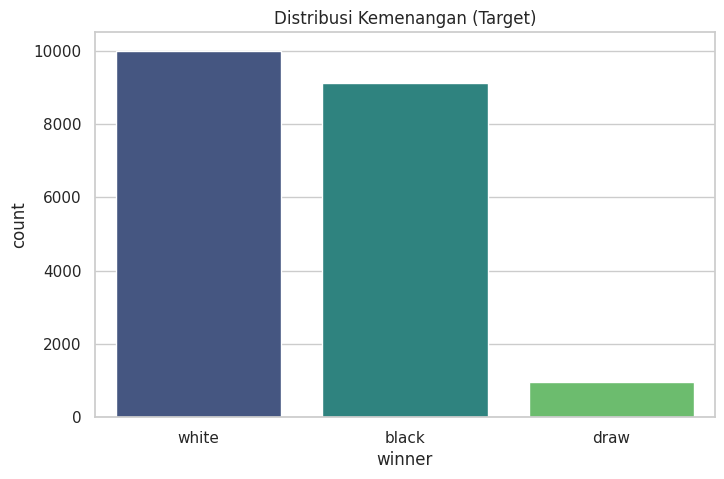

In [ ]:
# 3. EXPLORATORY DATA ANALYSIS (EDA)
print("--- Info Dataset ---")
df.info()

# Visualisasi Target (Winner)
plt.figure(figsize=(8, 5))
sns.countplot(x='winner', data=df, palette='viridis')
plt.title('Distribusi Kemenangan (Target)')
plt.show()


In [ ]:
# ==========================================
# 4. PREPROCESSING
# ==========================================
# Selisih rating seringkali lebih penting daripada rating itu sendiri
df['rating_difference'] = df['white_rating'] - df['black_rating']
# Kita buang kolom ID, Created_at, Moves karena tidak relevan untuk prediksi numerik
fitur_yang_dipakai = ['turns', 'white_rating', 'black_rating', 'rating_difference', 'victory_status', 'rated']
target = 'winner'

# Buat dataframe baru khusus untuk ML
df_ml = df[fitur_yang_dipakai + [target]].copy()

# C. Ubah Teks jadi Angka
le_status = LabelEncoder()
le_rated = LabelEncoder()
le_winner = LabelEncoder()

df_ml['victory_status'] = le_status.fit_transform(df_ml['victory_status'])
df_ml['rated'] = le_rated.fit_transform(df_ml['rated'])
df_ml['winner'] = le_winner.fit_transform(df_ml['winner'])

print("✅ Preprocessing selesai. Data siap dilatih.")
print(df_ml.head())



✅ Preprocessing selesai. Data siap dilatih.
   turns  white_rating  black_rating  rating_difference  victory_status  \
0     13          1500          1191                309               2   
1     16          1322          1261                 61               3   
2     61          1496          1500                 -4               1   
3     61          1439          1454                -15               1   
4     95          1523          1469                 54               1   

   rated  winner  
0      0       2  
1      1       0  
2      1       2  
3      1       2  
4      1       2  


In [ ]:


# ==========================================
# 5. SPLIT DATA
# ==========================================
X = df_ml.drop('winner', axis=1)  # Fitur
y = df_ml['winner']               # Target

# Bagi data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah Data Training: {X_train.shape[0]}")
print(f"Jumlah Data Testing : {X_test.shape[0]}")



Jumlah Data Training: 16046
Jumlah Data Testing : 4012


In [ ]:
# ==========================================
# 6. MODEL TRAINING
# ==========================================
print("⏳ Sedang melatih model Random Forest...")

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data training
rf_model.fit(X_train, y_train)

print("✅ Model selesai dilatih!")



⏳ Sedang melatih model Random Forest...
✅ Model selesai dilatih!


In [ ]:
# ==========================================
# 7. EVALUASI MODEL
# ==========================================
# Prediksi data test
y_pred = rf_model.predict(X_test)

# Hitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Buat Tabel Hasil
hasil_evaluasi = pd.DataFrame({
    'Algoritma': ['Random Forest'],
    'Akurasi': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
})

print("\n--- TABEL HASIL EVALUASI ---")
# Format tampilan agar angka desimal rapi
display(hasil_evaluasi.style.format({
    'Akurasi': '{:.2%}',
    'Precision': '{:.2%}',
    'Recall': '{:.2%}',
    'F1-Score': '{:.2%}'
}))




--- TABEL HASIL EVALUASI ---


,Algoritma,Akurasi,Precision,Recall,F1-Score
0,Random Forest,69.72%,69.77%,69.72%,69.71%


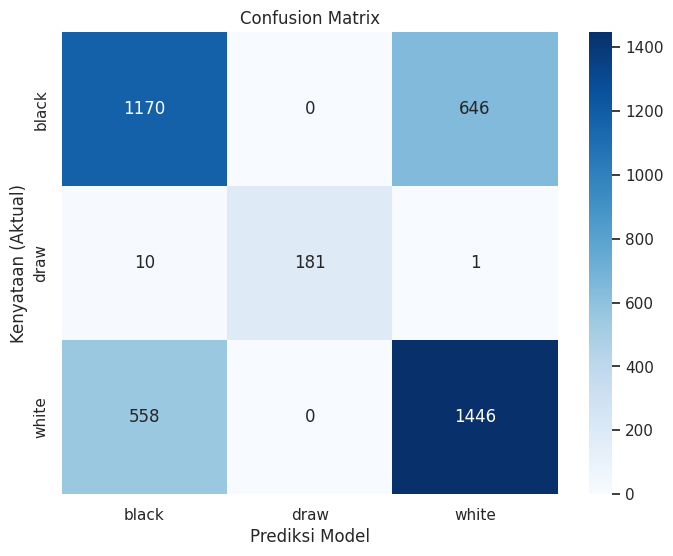

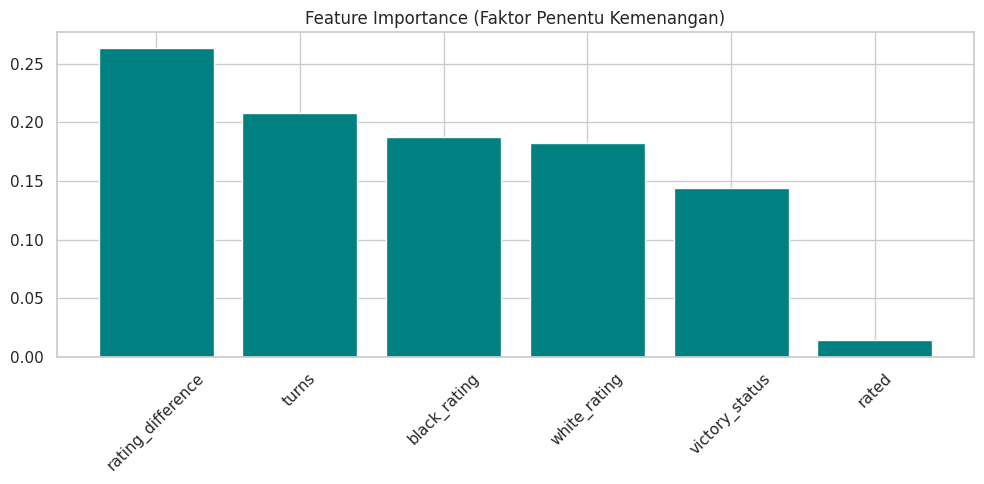


--- INTERPRETASI HASIL ---
1. Model memiliki akurasi sebesar 69.72%.
2. Lihat grafik 'Feature Importance' di atas: Faktor yang paling tinggi batangnya
   adalah faktor yang paling menentukan siapa pemenang pertandingan catur tersebut.


In [ ]:
# ==========================================
# 8. VISUALISASI HASIL & INTERPRETASI
# ==========================================
# A. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_winner.classes_, yticklabels=le_winner.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.show()

# B. Feature Importance (Apa yang paling mempengaruhi kemenangan?)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 5))
plt.title("Feature Importance (Faktor Penentu Kemenangan)")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# Interpretasi Singkat
print("\n--- INTERPRETASI HASIL ---")
print(f"1. Model memiliki akurasi sebesar {accuracy:.2%}.")
print("2. Lihat grafik 'Feature Importance' di atas: Faktor yang paling tinggi batangnya")
print("   adalah faktor yang paling menentukan siapa pemenang pertandingan catur tersebut.")
